In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import json
df = pd.read_csv('posts_details_boulos.tsv', '\t')

In [23]:
df.columns = ['Id', 'Data', 'Likes', 'Love', 'Haha', 'Wow', 'Sad', 'Angry', 'Shares']

In [24]:
df["date_time"] = pd.to_datetime(df['Data'])

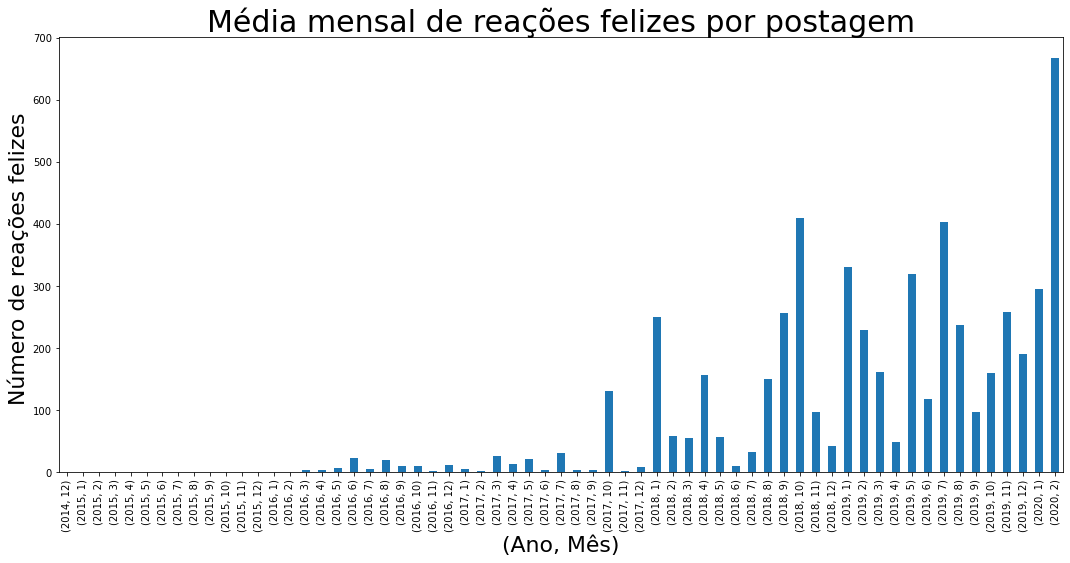

In [26]:
############# Gráfico histograma com o número de reações felizes (Haha) médio mensal #################
group_by_month = df.groupby([df["date_time"].dt.year, df["date_time"].dt.month])["Haha"].mean()
axes = group_by_month.plot(kind='bar')
axes.set_title('Média mensal de reações felizes por postagem',fontsize=30)
axes.set_xlabel('(Ano, Mês)',fontsize=22)
axes.set_ylabel('Número de reações felizes ',fontsize=22)
plt.show()

fig = axes.get_figure()
fig.savefig('media_haha.jpg')

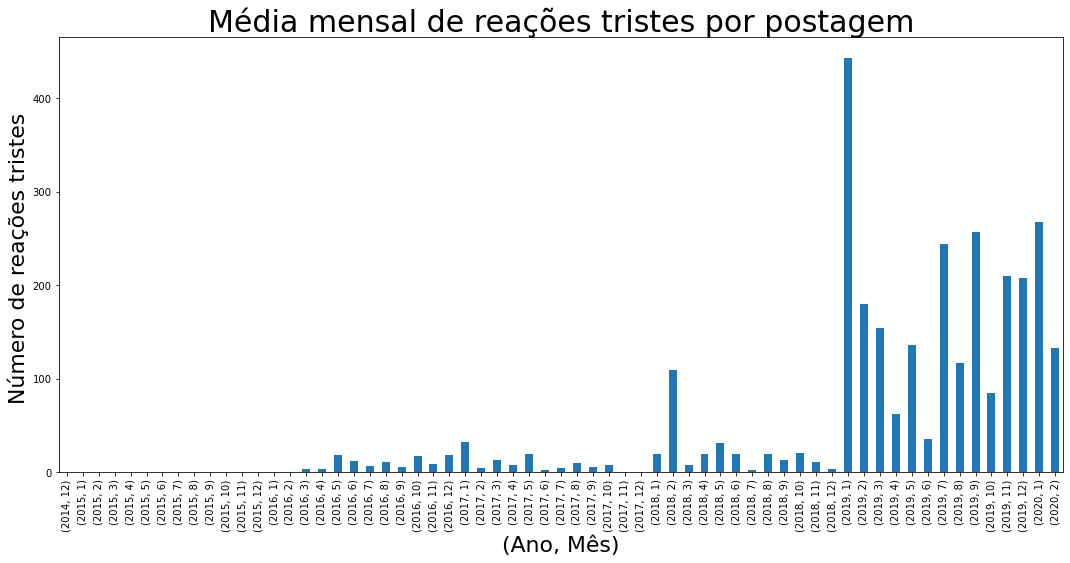

In [27]:
############# Gráfico histograma com o número de reações tristes (sad) médio mensal #################
group_by_month = df.groupby([df["date_time"].dt.year, df["date_time"].dt.month])["Sad"].mean()
axes = group_by_month.plot(kind='bar')
axes.set_title('Média mensal de reações tristes por postagem',fontsize=30)
axes.set_xlabel('(Ano, Mês)',fontsize=22)
axes.set_ylabel('Número de reações tristes ',fontsize=22)
plt.show()

fig = axes.get_figure()
fig.savefig('media_sad.jpg')

In [28]:
##################### Identificação das postagens que tiveram maior número de reações felizes (haha) ###################
tsv_file_path = 'posts_details_comments_%s.tsv' % ('boulos')
post_ids = []
dates = []
post_txt = []
num_likes = []
num_angry = []
num_shares = []
num_haha = []
num_wow = []
num_love = []
num_sad = []
column_names = []

with open(tsv_file_path) as tsv_file:
    header = tsv_file.readline()
    column_names = header.strip().split('\t') 
    for line in tsv_file:
        elements = line.strip().split('\t') 
        post_ids.append(elements[0])
        dates.append(elements[1])
        num_likes.append(int(elements[3]))
        num_love.append(int(elements[4]))
        num_haha.append(int(elements[5]))
        num_wow.append(int(elements[6]))
        num_sad.append(int(elements[7]))
        num_angry.append(int(elements[8]))
        num_shares.append(int(elements[9]))
        try:
            post_txt.append(json.loads(elements[2]))       
        except:
            post_txt.append('')
            
df_comments = pd.DataFrame(list(zip(post_ids, dates, post_txt, num_likes, num_love, num_haha, num_wow, num_sad, num_angry, num_shares)), 
               columns =column_names)

In [30]:
df_comments.columns = ['Id', 'Data', 'Message', 'Likes', 'Love', 'Haha', 'Wow', 'Sad', 'Angry', 'Shares']
sorted_df = df_comments.sort_values('Haha', ascending=False)
sorted_df.head(10)

,Id,Data,Message,Likes,Love,Haha,Wow,Sad,Angry,Shares
477,398845206932703_1342117372605477,2019-05-16T15:39:35+0000,Depois dizem que sou eu que invado a casa dos ...,6469,1673,14999,54,4,15,4643
67,398845206932703_1600086736808538,2020-02-09T21:09:29+0000,Onde o capitalismo deu certo? #CafeComBoulos,7732,1090,10460,55,22,535,4972
7,398845206932703_1617612131722665,2020-02-28T00:37:09+0000,VAMOS ÀS RUAS DIA 18 EM TODO O BRASIL! Contra ...,7814,1328,9973,33,16,668,9530
618,398845206932703_1287763071374241,2019-03-06T14:01:53+0000,Tudo o que você precisa saber sobre Golden Sho...,9772,1251,6746,53,13,14,10113
680,398845206932703_1255254001291815,2019-01-21T21:08:08+0000,Davos com laranja.,13938,3252,6388,130,9,15,8236
19,398845206932703_1613796432104235,2020-02-24T01:19:34+0000,Ocupando o banheiro químico no carnaval de São...,4990,1274,6215,22,0,3,677
159,398845206932703_1562494020567810,2020-01-03T19:10:59+0000,O dia em que encontrei meu sósia no Piauí. 😂,7285,2136,5663,806,6,15,1520
401,398845206932703_1386895678127646,2019-07-06T15:00:24+0000,Lendo comentários no Twitter a convite do Spot...,20455,5481,5016,67,33,393,10803
350,398845206932703_1416469135170300,2019-08-10T21:56:56+0000,#Faz1ano No debate da Band Bolsonaro ouviu o q...,34444,3742,4968,335,86,683,68954
383,398845206932703_1400140903469790,2019-07-22T12:23:33+0000,50 tons de Temer.,4119,33,4808,82,208,964,2863


In [31]:
##################### Identificação das postagens que tiveram maior número de reações tristes (sad) ###################
sorted_df = df_comments.sort_values('Sad', ascending=False)
sorted_df.head(10)

,Id,Data,Message,Likes,Love,Haha,Wow,Sad,Angry,Shares
674,398845206932703_1257414844409064,2019-01-24T20:55:30+0000,As ameaças e agressões covardes levaram meu am...,21576,3863,2960,38,7165,67,4506
298,398845206932703_1447617982055415,2019-09-16T20:33:31+0000,"Força, Felipe! #DitaduraNuncaMais",11298,58,280,1242,6462,513,4144
154,398845206932703_1565850296898849,2020-01-06T18:49:14+0000,A indiferença mata.,6487,13,6,37,5979,1215,5704
473,398845206932703_1343664815784066,2019-05-18T11:54:41+0000,"É o horror cotidiano, não mimimi. O porquê deb...",2959,21,4,283,4488,2245,7203
679,398845206932703_1255388477945034,2019-01-22T10:00:01+0000,Barbárie em Campinas. Chega de crimes de ódio!,3733,12,56,84,3367,765,4270
620,398845206932703_1286428031507745,2019-03-04T14:09:17+0000,"Criança negra, moradora de rua, estava cantand...",2414,4,12,84,3250,2829,2565
398,398845206932703_1390136934470187,2019-07-10T13:52:28+0000,O Brasil perdeu uma voz afiada.,7085,204,15,10,3009,9,963
134,398845206932703_1574973732653172,2020-01-14T18:49:56+0000,1 ano e 10 meses. Quem mandou matar Marielle?,5780,64,57,19,2508,102,818
338,398845206932703_1424336771050203,2019-08-20T12:28:10+0000,A desastrosa negação da realidade.,10749,57,184,48,2184,812,8434
288,398845206932703_1451940421623171,2019-09-21T16:19:13+0000,Barbárie de Witzel. Por Latuff Brasil.,2728,4,35,13,2166,461,4559
